# Seattle Kids in Urban Centers

## Problem Statement:

What role does density play in the growth in child population within Seattle's Urban Centers and villages?  What roles does density play in school enrollment?

Can incorporating UCV population data improve enrollment modeling?

What is the significance of Urban Centers and Villages in changing enrollments in Seattle Public Schools?

## Background
Welcome to Seattle, the tiniest big city you'll ever visit!  Though Seattle is by all acounts a major metropolitan area, the layout of the city lends itself to focus on the indivudal neighborhoods, resulting in a small town feel.  Across the city there are 32 'urban centers and villages' which act as miniature downtown areas.  These higher-density urban areas within the city are not accidental but rather the result of policies that focus development in specific areas of the city.  These areas are targeted for development as they are typically along major corridors with transportation.  This approach allows for growth while avoiding rezoning large fractions of residential land currently slated for single-family housing.  (add citation) Today, most of the residential land in the city remains zoned exclusively for single-family homes and most developable land in these residential areas has been used.  (add citation)  With land for single-family homes depleted, housing growth in the city will necessarily be focused on areas zoned for larger developments.  

The city of Seattle has seen immense population growth over the last twenty years.  While most residential land in the city has been zoned for single-family housing the explosive growth of the last two decades has resulted in more significant growth in the urban areas of the city.  The city-designated 'Urban Centers and Villages' (UCV) are subject to different zoning than the surrounding neighborhoods and are considered targets for dense development, including multi-family (e.g, high-rise apartments) as well as mixed-used residential/commercial. 

In July 2019, the city enacted legislation allowing the construction of accessory dwelling units (ADU) on single-family zoned property. (add citation) This change was enacted to help with the severe housing affordability crisis the city was facing.  While ADUs were constructed in record numbers (add citation) the housing crisis continues and the city is currently examining zoning restrictions in all areas of the city on a neighborhood-by-neighborhood basis.  This rezoning has focused on the UCVs, including the option to epand the boundaries of the zones and increase building height limits within the current boundaries.

During this immense growth in population Seattle has seen an increase in enrollment in Seattle Public Schools (SPS).  The relative young average age combined with millenials generally delaying life milestones compared to previous generations led to a decline in per capita children population during the early 2000s.  (add citation) But the number of children in the city has been rising significantly over the last 10 years.  In 2019, in response to the rising student population, SPS reopened a high school on the north end that had been closed for 38 years. 

With rapidly changing demographics, the city has been slow to respond to the growing need for schools in more urban parts of the city.  This includes the high density areas in South Seattle as well as the downtown core.  The prevailing attitude is that "people with children live in single family housing" or more explictly, "people don't want to have children in apartments."  The experiences of families living in multi-family housing have been summarily dismissed.  Moving forward, growth in the 

This project examines the child population growth and its relation to the UCVs and SPS enrollment.  

## Data Collection

Looking at population and enrollment necessitated finding separated datasets that could be connected by geographic location.

Population data was available from several sources.  Data provided by the City of Seattle data was selected as it was already aggreggated into the city-designated Urban Centers and Villages.  This data was available in both pdf reports and csv files from the city's main data portal.  Population data was retrieved from the city of Seattle [population data website](https://www.seattle.gov/opcd/population-and-demographics/decennial-census) on December 5, 2021. These reports are based on early results from the 2020 census, aggregated by city-designated urban centers (subset of the city) as well as by larger neighborhood areas (covering entire city).  

Enrollment data is available directly from the Seattle Public School district via mandated enrollment reports.  The data is provided in pdfs covering individual years, along with comparison to overall enrollment in prior year.  Enrollment data was retrieved from [Seattle Public Schools](https://www.seattleschools.org/departments/enrollment-planning/enrollment-data/annual-enrollment-reports/) on December 5, 2021.  

In addition to enrollment reports, maps for the SPS attendance areas were used to construct a dataset connecting UCVs to the relevant schools.

## Data Cleaning

The population data was provided in easily readable csv files.  Data cleaning consisted of verifying the data was imported correctly, removing features that would not be used and renaming features to increase readability.  

The total enrollment data was provided in pdf reports, one for each school year 2011-2020.  With the exception of the 2016 report, the individual school enrollments were listed in tabular format and was copied from the reports.  The 2016 report did not contain the same breakdown but the data can be obtained from the 2017 which shows comparison with previous year.  Each table spans three pages of the pdf and several fixable formatting issues cropped up during transfer. The process was overall straightforward with only minor data manipulation required to fix merged cell data that was not transfered properly.  Data was spot checked for inconsistencies in both formatting and numerical values.  Computed column totals were compared to the totals given in the pdf.  

The total grade level enrollment, however, was provided only in graphical format, with each report covering the previous five years.  The data from school enrollment was used to produce K-5, 6-8, and 9-12 enrollment statistics.  If further breakdown is desired the data will need to be transfered by hand from the graphs in the individual enrollment reports.  

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Population Data

In [2]:
# get population data
ucvpop = pd.read_csv("./data/citydata/Urban_Centers_and_Villages_with_PL_94-171_Redistricting__Data_for_1990-2020.csv")
ucvpop.set_index('OBJECTID', inplace = True)
ucvpop.head()

,NEIGH_NO,NEIGH_NAME,UV_TYPE,TYPE_NAME,AREA_ACRES,F1990_PL_data_TOT_POP,F1990_PL_data_WHITE_NOT,F1990_PL_data_BLACK_NOT,F1990_PL_data_AMI_NOT,F1990_PL_data_ASIAN_NOT,...,F1990_PL_data_GQ_I,F1990_PL_data_GQ_N_I,F2000_PL_data_GQ_I,F2000_PL_data_GQ_N_I,F2010_PL_data_GQ_I,F2010_PL_data_GQ_N_I,F2020_PL_data_GQ_I,F2020_PL_data_GQ_N_I,Shape__Area,Shape__Length
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,106,Upper Queen Anne,RUV,Residential Urban Village,52.658720,1921,1715,56,11,71,...,0,37,0,0,0,4,0,0,2.293805e+06,11354.22008
2,302,Fremont,HUV,Hub Urban Village,214.511083,3153,2697,90,64,189,...,0,47,0,63,0,90,0,66,9.344065e+06,16236.22258
3,205,West Seattle Junction,HUV,Hub Urban Village,270.417026,3627,3169,145,33,150,...,401,14,358,13,272,0,235,12,1.177932e+07,20674.93070
4,111,Columbia City,RUV,Residential Urban Village,334.543340,4281,898,1827,111,1269,...,0,5,98,7,95,20,102,80,1.457265e+07,25210.67846
5,414,First Hill/Capitol Hill,UC,Urban Center,916.221801,28940,21504,3037,534,2403,...,660,1370,782,2278,332,2329,846,3135,3.991046e+07,31324.33554


In [3]:
print('UCV data shape:', ucvpop.shape)

UCV data shape: (32, 110)


In [4]:
print('nulls in UCV population data:', ucvpop.isna().sum().sum())

nulls in UCV population data: 0


The UCV data has no nulls.  We have 110 columns for each of the 32 Urban Centers/Villages

In [5]:
# get population data
pop = pd.read_csv('./data/citydata/Community_Reporting_Areas_with_PL_94-171_Redistricting__Data_for_1990-2020.csv')
pop.set_index('OBJECTID', inplace= True)
pop.head()

,NEIGH_NO,NEIGH_NAME,DETL_NAMES,NEIGHDIST_NO,NEIGHDIST_NAME,AREA_ACRES,AREA_SQMI,F1990_PL_data_TOT_POP,F1990_PL_data_WHITE_NOT,F1990_PL_data_BLACK_NOT,...,F1990_PL_data_GQ_I,F1990_PL_data_GQ_N_I,F2000_PL_data_GQ_I,F2000_PL_data_GQ_N_I,F2010_PL_data_GQ_I,F2010_PL_data_GQ_N_I,F2020_PL_data_GQ_I,F2020_PL_data_GQ_N_I,Shape__Area,Shape__Length
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,1.1,Arbor Heights,"Arbor Heights, Brace Point, Endolyne, Arroyo",1,Southwest,785.9,1.23,6247,5603,79,...,0,0,0,8,5,3,0,5,3.423387e+07,27702.727646
2,1.2,Fauntleroy/Seaview,"Fauntleroy, Gatewood, Morgan Junction, Lincoln...",1,Southwest,1393.1,2.18,12919,11746,261,...,122,23,103,9,86,25,53,48,6.068510e+07,48830.048317
3,1.3,West Seattle Junction/Genesee Hill,"Seaview, Fairmount Park, Morgan Junction, Gene...",1,Southwest,1447.5,2.26,16017,14607,249,...,504,0,431,0,350,20,299,94,6.305462e+07,38739.896257
4,1.4,Alki/Admiral,"Alki, Admiral",1,Southwest,898.3,1.40,9880,9212,82,...,143,3,101,0,107,24,149,33,3.912974e+07,50339.656415
5,2.1,North Delridge,"North Delridge, Pigeon Point, Avalon, Luna Par...",2,Delridge Neighborhoods,1606.9,2.51,3724,2844,315,...,0,84,0,49,1,16,0,52,6.999494e+07,64237.742682


In [6]:
print('citywide population data shape:',pop.shape)

citywide population data shape: (53, 112)


In [7]:
print('nulls in citywide population data:',pop.isna().sum().sum())

nulls in citywide population data: 0


The broader neighborhood data has no nulls.  It is broken down into 53 neighborhoods spanning the entire city with 112 data columns for each neighborhood.

## Exploratory Data Analysis: overall population changes
Adding a `change` feature that represents the change in population from 2010 to 2020 and a `perc_change` that represents the percentage change in population from 2010 to 2020

In [8]:
ucvpop['change'] = ucvpop['F2020_PL_data_TOT_POP'] - ucvpop['F2010_PL_data_TOT_POP']
pop['change'] = pop['F2020_PL_data_TOT_POP'] - pop['F2010_PL_data_TOT_POP']

In [9]:
ucvpop['perc_change'] = (ucvpop['F2020_PL_data_TOT_POP'] - ucvpop['F2010_PL_data_TOT_POP'])/ucvpop['F2010_PL_data_TOT_POP']
pop['perc_change'] = (pop['F2020_PL_data_TOT_POP'] - pop['F2010_PL_data_TOT_POP'])/pop['F2010_PL_data_TOT_POP']

In [10]:
ucvpop[['NEIGH_NAME', 'AREA_ACRES','F2010_PL_data_TOT_POP','F2020_PL_data_TOT_POP', 'change', 'perc_change']].sort_values('perc_change', ascending=False).head()

,NEIGH_NAME,AREA_ACRES,F2010_PL_data_TOT_POP,F2020_PL_data_TOT_POP,change,perc_change
OBJECTID,,,,,,
7,South Lake Union,339.886927,3774,12905,9131,2.419449
3,West Seattle Junction,270.417026,5043,9160,4117,0.816379
6,Roosevelt,170.211776,2616,4678,2062,0.788226
12,Greater Duwamish,4953.281793,1064,1836,772,0.725564
4,Columbia City,334.543340,4609,7661,3052,0.662183


In [11]:
pop[['NEIGH_NAME', 'AREA_ACRES','F2010_PL_data_TOT_POP','F2020_PL_data_TOT_POP', 'change', 'perc_change']].sort_values('perc_change', ascending=False).head()

,NEIGH_NAME,AREA_ACRES,F2010_PL_data_TOT_POP,F2020_PL_data_TOT_POP,change,perc_change
OBJECTID,,,,,,
47,Cascade/Eastlake,727.6,13526,29182,15656,1.157474
44,Ballard,492.9,6739,11191,4452,0.660632
12,Duwamish/SODO,2343.5,2354,3611,1257,0.533985
21,Judkins Park,202.9,2925,4284,1359,0.464615
52,Downtown Commercial Core,206.5,4070,5813,1743,0.428256


In [12]:
print('UCV population:',sum(ucvpop['F2020_PL_data_TOT_POP']))
print('Total population:',sum(pop['F2020_PL_data_TOT_POP']))
print('UCV population fraction', round(sum(ucvpop['F2020_PL_data_TOT_POP'])/sum(pop['F2020_PL_data_TOT_POP']),3))

UCV population: 308307
Total population: 737015
UCV population fraction 0.418


In [13]:
print('UCV area (acres):',sum(ucvpop['AREA_ACRES']))
print('Total area (acres):',sum(pop['AREA_ACRES']))
print('UCV area fraction', round(sum(ucvpop['AREA_ACRES'])/sum(pop['AREA_ACRES']),3))

UCV area (acres): 16016.586737009999
Total area (acres): 53560.99999999999
UCV area fraction 0.299


In 2020, approximately 41.8% of the city population lived in an urban center or village while the urban villages only accounted for 29.9% of the city acreage.

In [14]:
# growth 2010-2020
print('All-ages population growth from 2010 to 2020')
print('UCV population growth:',(sum(ucvpop['F2020_PL_data_TOT_POP'])-sum(ucvpop['F2010_PL_data_TOT_POP'])))
print('Overall population growth:',(sum(pop['F2020_PL_data_TOT_POP'])-sum(pop['F2010_PL_data_TOT_POP'])))
print()
print('All-ages population growth rate from 2010 to 2020')
print('UCV population growth:',(sum(ucvpop['F2020_PL_data_TOT_POP'])-sum(ucvpop['F2010_PL_data_TOT_POP']))/sum(ucvpop['F2010_PL_data_TOT_POP']))
print('Overall population growth:',(sum(pop['F2020_PL_data_TOT_POP'])-sum(pop['F2010_PL_data_TOT_POP']))/sum(pop['F2010_PL_data_TOT_POP']))

All-ages population growth from 2010 to 2020
UCV population growth: 87281
Overall population growth: 128355

All-ages population growth rate from 2010 to 2020
UCV population growth: 0.3948901939138382
Overall population growth: 0.21088128018926822


## Exploratory Data Analysis: Kids

In [15]:
print('\nKids in UCVs\n')
print('2010 ',sum(ucvpop['F2010_PL_data_POP_UNDER_18']))
print('2020 ',sum(ucvpop['F2020_PL_data_POP_UNDER_18']))


Kids in UCVs

2010  21895
2020  27108


In [16]:
print('\nKids in entire city\n')
print('2010 ', sum(pop['F2010_PL_data_POP_UNDER_18']))
print('2020 ', sum(pop['F2020_PL_data_POP_UNDER_18']))


Kids in entire city

2010  93513
2020  106841


In [17]:
print("Fractional change in CHILD population in UCVs",
      round((sum(ucvpop['F2020_PL_data_POP_UNDER_18']) - 
             sum(ucvpop['F2010_PL_data_POP_UNDER_18']))/sum(ucvpop['F2010_PL_data_POP_UNDER_18']),
            3))
print()
print("Fractional change in CHILD population in entire city",
      round((sum(pop['F2020_PL_data_POP_UNDER_18']) - 
             sum(pop['F2010_PL_data_POP_UNDER_18']))/sum(pop['F2010_PL_data_POP_UNDER_18'])
            ,3), '\n')


Fractional change in CHILD population in UCVs 0.238

Fractional change in CHILD population in entire city 0.143 



In [18]:
print("Fractional change in ADULT population in UCVs", 
      round((sum(ucvpop['F2020_PL_data_POP_OVER_18']) - 
             sum(ucvpop['F2010_PL_data_POP_OVER_18']))/sum(ucvpop['F2010_PL_data_POP_OVER_18'])
            ,3))
print()
print("Fractional change in ADULT population in entire city",
      round((sum(pop['F2020_PL_data_POP_OVER_18']) - 
             sum(pop['F2010_PL_data_POP_OVER_18']))/sum(pop['F2010_PL_data_POP_OVER_18'])
            ,3),'\n')

Fractional change in ADULT population in UCVs 0.412

Fractional change in ADULT population in entire city 0.223 



In [19]:
# growth 2010-2020
print('Child population growth from 2010 to 2020')
print('UCV:     ', (sum(ucvpop['F2020_PL_data_POP_UNDER_18'])
                    - sum(ucvpop['F2010_PL_data_POP_UNDER_18'])))
print('Citywide:', (sum(pop['F2020_PL_data_POP_UNDER_18'])
                    - sum(pop['F2010_PL_data_POP_UNDER_18'])))
print()
print('Child population growth rate from 2010 to 2020')
print('UCV:     ', round((sum(ucvpop['F2020_PL_data_POP_UNDER_18'])
                          - sum(ucvpop['F2010_PL_data_POP_UNDER_18']))
                         / sum(ucvpop['F2010_PL_data_POP_UNDER_18']),3))
print('Citywide:', round((sum(pop['F2020_PL_data_POP_UNDER_18'])
                          - sum(pop['F2010_PL_data_POP_UNDER_18']))
                         / sum(pop['F2010_PL_data_POP_UNDER_18']),3))

Child population growth from 2010 to 2020
UCV:      5213
Citywide: 13328

Child population growth rate from 2010 to 2020
UCV:      0.238
Citywide: 0.143


From 2010 to 2020 the city as a whole saw an increase of 14.3% in the population of children.  Urban centers and villages as a whole saw a 23.8% rise in the child population over the same time period

Both UCVs and the city as a whole saw a larger fractional change in the adult population than in the child population.  The UCV adult population grew by 41.2% while the total adult population grew by 22.3% from 2010 to 2020.

In [77]:
# pull out just kids and just adults in the UCV data and total population data
ucvkids = ucvpop[['NEIGH_NAME','NEIGH_NO', 'AREA_ACRES']+[col for col in ucvpop.columns if 'UNDER' in col]]
kids = pop[['NEIGH_NAME','NEIGH_NO', 'AREA_ACRES']+[col for col in pop.columns if 'UNDER' in col]]

ucvadults = ucvpop[['NEIGH_NAME','NEIGH_NO', 'AREA_ACRES']+[col for col in ucvpop.columns if 'OVER' in col]]
adults = pop[['NEIGH_NAME','NEIGH_NO', 'AREA_ACRES']+[col for col in pop.columns if 'OVER' in col]]

In [79]:
ucvkids.columns = ['neighborhood','neighborhood_no','area','1990','2000','2010','2020']
kids.columns =  ['neighborhood','neighborhood_no','area','1990','2000','2010','2020']
adults.columns = ['neighborhood','neighborhood_no','area','1990','2000','2010','2020']
ucvadults.columns = ['neighborhood','neighborhood_no','area','1990','2000','2010','2020']

In [81]:
ucvkids[ucvkids['neighborhood']=='Uptown']

,neighborhood,neighborhood_no,area,1990,2000,2010,2020
19,Uptown,412,333.000698,172,147,222,596


Look at the UCVs with the largest fractional change in child population

In [82]:
# look at changes and fractional changes
ucvkids['change'] = ucvkids['2020']-ucvkids['2010']
ucvkids['frac_change'] = (ucvkids['2020']-ucvkids['2010'])/ucvkids['2010']
ucvkids['density'] = ucvkids['2020']/ucvkids['area']

ucvkids.sort_values('frac_change', ascending=False)

,neighborhood,neighborhood_no,area,1990,2000,2010,2020,change,frac_change,density
6,South Lake Union,312,339.886927,80,122,158,549,391,2.474684,1.615243
16,Ballard-Interbay-Northend,501,931.972864,107,66,67,205,138,2.059701,0.219963
19,Uptown,412,333.000698,172,147,222,596,374,1.684685,1.789786
18,Downtown,413,953.281747,276,755,733,1607,874,1.192360,1.685756
7,University District,401,751.963878,592,559,452,936,484,1.070796,1.244741
11,Greater Duwamish,502,4953.281793,148,213,135,245,110,0.814815,0.049462
27,Eastlake,107,199.255956,142,116,202,340,138,0.683168,1.706348
13,Green Lake,207,107.444638,103,94,163,265,102,0.625767,2.466386
1,Fremont,302,214.511083,266,171,215,339,124,0.576744,1.580338
22,Bitter Lake Village,114,363.779566,379,396,597,929,332,0.556114,2.553744


Look at the UCVs with the highest number of kids in 2020

In [83]:
ucvkids.sort_values('2020', ascending=False).head(10)

,neighborhood,neighborhood_no,area,1990,2000,2010,2020,change,frac_change,density
31,Othello,123,498.963241,2338,2088,2759,2817,58,0.021022,5.645706
21,23rd & Union-Jackson,109,625.266413,2036,2103,1813,1902,89,0.049090,3.041903
4,First Hill/Capitol Hill,414,916.221801,1729,1881,1786,1894,108,0.060470,2.067185
18,Downtown,413,953.281747,276,755,733,1607,874,1.192360,1.685756
3,Columbia City,111,334.543340,1335,1423,968,1478,510,0.526860,4.417963
29,Ballard,303,495.476305,951,892,964,1343,379,0.393154,2.710523
20,Rainier Beach,204,346.143874,1159,1193,1087,1280,193,0.177553,3.697884
23,Mt Baker,305,491.018058,931,1016,1046,1072,26,0.024857,2.183219
9,Westwood-Highland Park,127,275.062196,970,1091,1093,947,-146,-0.133577,3.442858
7,University District,401,751.963878,592,559,452,936,484,1.070796,1.244741


Look at UCVS with the largest change in number of kids in 2020

In [30]:
ucvkids.sort_values('change', ascending=False).head(10)

,neighborhood,neighborhood_no,area,1990,2000,2010,2020,change,frac_change,density
OBJECTID,,,,,,,,,,
19,Downtown,413,953.281747,276,755,733,1607,874,1.192360,1.685756
4,Columbia City,111,334.543340,1335,1423,968,1478,510,0.526860,4.417963
8,University District,401,751.963878,592,559,452,936,484,1.070796,1.244741
7,South Lake Union,312,339.886927,80,122,158,549,391,2.474684,1.615243
30,Ballard,303,495.476305,951,892,964,1343,379,0.393154,2.710523
20,Uptown,412,333.000698,172,147,222,596,374,1.684685,1.789786
23,Bitter Lake Village,114,363.779566,379,396,597,929,332,0.556114,2.553744
3,West Seattle Junction,205,270.417026,413,434,438,677,239,0.545662,2.503541
21,Rainier Beach,204,346.143874,1159,1193,1087,1280,193,0.177553,3.697884


Highest density of kids in UCVS


In [31]:
ucvkids.sort_values('density', ascending = False)

,neighborhood,neighborhood_no,area,1990,2000,2010,2020,change,frac_change,density
OBJECTID,,,,,,,,,,
32,Othello,123,498.963241,2338,2088,2759,2817,58,0.021022,5.645706
4,Columbia City,111,334.543340,1335,1423,968,1478,510,0.526860,4.417963
11,Lake City,201,142.267043,253,394,507,622,115,0.226824,4.372060
18,Greenwood-Phinney Ridge,102,94.157645,260,355,374,410,36,0.096257,4.354399
1,Upper Queen Anne,106,52.658720,125,126,136,201,65,0.477941,3.817032
21,Rainier Beach,204,346.143874,1159,1193,1087,1280,193,0.177553,3.697884
10,Westwood-Highland Park,127,275.062196,970,1091,1093,947,-146,-0.133577,3.442858
9,Crown Hill,103,270.988754,579,644,747,927,180,0.240964,3.420806
13,Madison-Miller,131,145.323420,480,334,450,482,32,0.071111,3.316740


Ballard-Interbay-Northend and Greater Duwamish are density outliers.  Both of these districts are huge industrial areas of the city that are covered in the urban village development plan.

Ballard-Interbay-Northend includes the former WA National Guard site recently given over to the city.  Redeveloment options for this area are currently being explored by a legislatively appointed [advisory council](https://www.commerce.wa.gov/about-us/research-services/interbay-public-development-advisory-committee/).  

Greater Duwamish is the area including the port of Seattle.  

For the purpose of current data we can exclude them from the residential population analysis as they are mainly industrial rather than mixed-use, residential/commerical areas.  



In [32]:
#dropping Ballard-Interbay-Northend and Greater Duwamish areas
ucvkids.drop(index = 12, inplace = True)
ucvkids.drop(index = 17, inplace = True)

Inconsistencies in the definition of Urban villages and urban centers leads to oddities in the density values.  Uptown, Downtown, South Lake Union and First Hill/Capitol Hill create a contiguous block.  That is, the entirety of central Seattle is in one of these UCVs, even though there are vast variations in density inside each of the UCVs.  The choice to include all of central Seattle is most likely related to existed zoning at the time of creation which meant that there was essentially no single-family zoned areas to contend with.  There were, however, empty lots, parking lots and industrial buildings that have since been replaced with mixed use or multi-family residential buildings.  

The definition of UCV boundaries for areas outside of central Seattle are much tighter, owing to strict zoning laws and the fight against expansion of non-single family housing.  Development in these areas has been limited to directly along the main thoroughfare with the urban center/village defined by close proximity to the arterial.  This leads to very high densities for these neighborhoods despite building height restrictions being signficantly lower.  

Furthermore if we look at each of the UCVs outside of central Seattle, they are all in close proximity to at least one if not several elementary schools.  There are no schools, however, within UCV boundaries.  That is, all children within a UCV are required to the leave the UCV to attend school.  

Worth noting, many kids experiencing homeless are considered residents of the Downtown and are transported to Capitol Hill for school.  This is in large part due to the concentration of shelters in the downtown area. In 2017, 20% of students at the elementary school assigned to Downtown were experiencing homelessness.

In [84]:
ucvkids['change2000to2010'] = ucvkids['2010']-ucvkids['2000']

In [85]:
ucvkids.sort_values('change2000to2010', ascending=False).head(10)

,neighborhood,neighborhood_no,area,1990,2000,2010,2020,change,frac_change,density,change2000to2010
31,Othello,123,498.963241,2338,2088,2759,2817,58,0.021022,5.645706,671
28,Wallingford,203,258.005613,448,477,701,839,138,0.196862,3.251867,224
22,Bitter Lake Village,114,363.779566,379,396,597,929,332,0.556114,2.553744,201
14,Northgate,301,412.291123,439,685,826,862,36,0.043584,2.090756,141
12,Madison-Miller,131,145.323420,480,334,450,482,32,0.071111,3.316740,116
10,Lake City,201,142.267043,253,394,507,622,115,0.226824,4.372060,113
8,Crown Hill,103,270.988754,579,644,747,927,180,0.240964,3.420806,103
27,Eastlake,107,199.255956,142,116,202,340,138,0.683168,1.706348,86
19,Uptown,412,333.000698,172,147,222,596,374,1.684685,1.789786,75
29,Ballard,303,495.476305,951,892,964,1343,379,0.393154,2.710523,72


In [86]:
ucvkids['perc_change2000to2010'] = ucvkids['change2000to2010']/ucvkids['2000']

In [87]:
ucvkids.sort_values('perc_change2000to2010',ascending=False).head(10)

,neighborhood,neighborhood_no,area,1990,2000,2010,2020,change,frac_change,density,change2000to2010,perc_change2000to2010
27,Eastlake,107,199.255956,142,116,202,340,138,0.683168,1.706348,86,0.741379
13,Green Lake,207,107.444638,103,94,163,265,102,0.625767,2.466386,69,0.734043
19,Uptown,412,333.000698,172,147,222,596,374,1.684685,1.789786,75,0.510204
22,Bitter Lake Village,114,363.779566,379,396,597,929,332,0.556114,2.553744,201,0.507576
28,Wallingford,203,258.005613,448,477,701,839,138,0.196862,3.251867,224,0.469602
12,Madison-Miller,131,145.323420,480,334,450,482,32,0.071111,3.316740,116,0.347305
31,Othello,123,498.963241,2338,2088,2759,2817,58,0.021022,5.645706,671,0.321360
6,South Lake Union,312,339.886927,80,122,158,549,391,2.474684,1.615243,36,0.295082
10,Lake City,201,142.267043,253,394,507,622,115,0.226824,4.372060,113,0.286802
1,Fremont,302,214.511083,266,171,215,339,124,0.576744,1.580338,44,0.257310


In [88]:
# neighborhoods with largest number of kids in 2020
ucvkids.sort_values('2020', ascending=False).head()

,neighborhood,neighborhood_no,area,1990,2000,2010,2020,change,frac_change,density,change2000to2010,perc_change2000to2010
31,Othello,123,498.963241,2338,2088,2759,2817,58,0.021022,5.645706,671,0.321360
21,23rd & Union-Jackson,109,625.266413,2036,2103,1813,1902,89,0.049090,3.041903,-290,-0.137898
4,First Hill/Capitol Hill,414,916.221801,1729,1881,1786,1894,108,0.060470,2.067185,-95,-0.050505
18,Downtown,413,953.281747,276,755,733,1607,874,1.192360,1.685756,-22,-0.029139
3,Columbia City,111,334.543340,1335,1423,968,1478,510,0.526860,4.417963,-455,-0.319747


In [89]:
#neighborhoods with largest change in number of kids from 2010 to 2020
ucvkids.sort_values('change', ascending=False).head()

,neighborhood,neighborhood_no,area,1990,2000,2010,2020,change,frac_change,density,change2000to2010,perc_change2000to2010
18,Downtown,413,953.281747,276,755,733,1607,874,1.192360,1.685756,-22,-0.029139
3,Columbia City,111,334.543340,1335,1423,968,1478,510,0.526860,4.417963,-455,-0.319747
7,University District,401,751.963878,592,559,452,936,484,1.070796,1.244741,-107,-0.191413
6,South Lake Union,312,339.886927,80,122,158,549,391,2.474684,1.615243,36,0.295082
29,Ballard,303,495.476305,951,892,964,1343,379,0.393154,2.710523,72,0.080717


In [90]:
# neighborhoods with largest fraction of kids in city
ucvkids['frac2020'] = ucvkids['2020']/np.sum(pop['F2020_PL_data_POP_UNDER_18'])
ucvkids.sort_values('frac2020', ascending=False).head(10)

,neighborhood,neighborhood_no,area,1990,2000,2010,2020,change,frac_change,density,change2000to2010,perc_change2000to2010,frac2020
31,Othello,123,498.963241,2338,2088,2759,2817,58,0.021022,5.645706,671,0.321360,0.026366
21,23rd & Union-Jackson,109,625.266413,2036,2103,1813,1902,89,0.049090,3.041903,-290,-0.137898,0.017802
4,First Hill/Capitol Hill,414,916.221801,1729,1881,1786,1894,108,0.060470,2.067185,-95,-0.050505,0.017727
18,Downtown,413,953.281747,276,755,733,1607,874,1.192360,1.685756,-22,-0.029139,0.015041
3,Columbia City,111,334.543340,1335,1423,968,1478,510,0.526860,4.417963,-455,-0.319747,0.013834
29,Ballard,303,495.476305,951,892,964,1343,379,0.393154,2.710523,72,0.080717,0.012570
20,Rainier Beach,204,346.143874,1159,1193,1087,1280,193,0.177553,3.697884,-106,-0.088852,0.011980
23,Mt Baker,305,491.018058,931,1016,1046,1072,26,0.024857,2.183219,30,0.029528,0.010034
9,Westwood-Highland Park,127,275.062196,970,1091,1093,947,-146,-0.133577,3.442858,2,0.001833,0.008864
7,University District,401,751.963878,592,559,452,936,484,1.070796,1.244741,-107,-0.191413,0.008761


In [91]:
print('2020: ',sum(pop['F2020_PL_data_POP_UNDER_18']))
print('change: ',sum(pop['F2020_PL_data_POP_UNDER_18']) - sum(pop['F2010_PL_data_POP_UNDER_18']))

2020:  106841
change:  13328


In [92]:
print('2020: ',sum(ucvkids['2020']))
print('change: ',sum(ucvkids['2020']) - sum(ucvkids['2010']))

2020:  27108
change:  5213


In [93]:
(sum(ucvkids['2020']) - sum(ucvkids['2010']))/(sum(pop['F2020_PL_data_POP_UNDER_18']) - sum(pop['F2010_PL_data_POP_UNDER_18']))

0.39113145258103243

37% of the growth in Seattle child population was in UCVs.  



In [94]:
#look at the contiguous Downtown, Uptown, SLU, Capitol Hill areas
corekids = ucvkids[(ucvkids['neighborhood'] =='Downtown') | (ucvkids['neighborhood'] == 'Uptown') | (ucvkids['neighborhood']=='First Hill/Capitol Hill')| (ucvkids['neighborhood']=='South Lake Union')]
corekids

,neighborhood,neighborhood_no,area,1990,2000,2010,2020,change,frac_change,density,change2000to2010,perc_change2000to2010,frac2020
4,First Hill/Capitol Hill,414,916.221801,1729,1881,1786,1894,108,0.060470,2.067185,-95,-0.050505,0.017727
6,South Lake Union,312,339.886927,80,122,158,549,391,2.474684,1.615243,36,0.295082,0.005138
18,Downtown,413,953.281747,276,755,733,1607,874,1.192360,1.685756,-22,-0.029139,0.015041
19,Uptown,412,333.000698,172,147,222,596,374,1.684685,1.789786,75,0.510204,0.005578


In [95]:
sum(corekids['2020'])

4646

In [96]:
sum(corekids['2010'])

2899

In [97]:
ucvkids.sort_values('change',ascending=False).head(10)

,neighborhood,neighborhood_no,area,1990,2000,2010,2020,change,frac_change,density,change2000to2010,perc_change2000to2010,frac2020
18,Downtown,413,953.281747,276,755,733,1607,874,1.192360,1.685756,-22,-0.029139,0.015041
3,Columbia City,111,334.543340,1335,1423,968,1478,510,0.526860,4.417963,-455,-0.319747,0.013834
7,University District,401,751.963878,592,559,452,936,484,1.070796,1.244741,-107,-0.191413,0.008761
6,South Lake Union,312,339.886927,80,122,158,549,391,2.474684,1.615243,36,0.295082,0.005138
29,Ballard,303,495.476305,951,892,964,1343,379,0.393154,2.710523,72,0.080717,0.012570
19,Uptown,412,333.000698,172,147,222,596,374,1.684685,1.789786,75,0.510204,0.005578
22,Bitter Lake Village,114,363.779566,379,396,597,929,332,0.556114,2.553744,201,0.507576,0.008695
2,West Seattle Junction,205,270.417026,413,434,438,677,239,0.545662,2.503541,4,0.009217,0.006337
20,Rainier Beach,204,346.143874,1159,1193,1087,1280,193,0.177553,3.697884,-106,-0.088852,0.011980
8,Crown Hill,103,270.988754,579,644,747,927,180,0.240964,3.420806,103,0.159938,0.008676


In [98]:
ucvkids.columns

Index(['neighborhood', 'neighborhood_no', 'area', '1990', '2000', '2010',
       '2020', 'change', 'frac_change', 'density', 'change2000to2010',
       'perc_change2000to2010', 'frac2020'],
      dtype='object')

In [99]:
kids.columns

Index(['neighborhood', 'neighborhood_no', 'area', '1990', '2000', '2010',
       '2020'],
      dtype='object')

In [100]:
# saving dataframes
# saving urban center kid data
ucvkids.to_csv('./data/seattle_ucv_kids_cleaned.csv')
kids.to_csv('./data/seattle_kids_cleaned.csv')
pop.to_csv('./data/seattle_pop_cleaned.csv')
ucvpop.to_csv('./data/seattle_ucv_pop_cleaned.csv')

## School Enrollment Data

Looking over the last 20 years, each year the Seattle Public Schools serves approximately 50% of the children in the city.  Over the last 5 years, enrollment across the district has averaged 53,300 students (K-12).  The pandemic saw a decrease in enrollment in 2020 with many families delaying kindergarten and choosing homeschooling for young children.  Pre-pandemic data showed steady enrollment in kindergarten year over year.  During the same time period there were minor declines in 1st-5th enrollment of abpproximately 1% year over year, an average increase of 1.6% in 6-8th enrollment, and an average increase in 9-12th enrollment of 1.2% per year.  All told the district serves roughly half of the total children in the city.  The remainder are either too young for public schools (Seattle has a separate preschool program) or are served by private schools or homeschooling.  



## Data for Population Dashboard
To get the data ready for the dashboard I reorganized the dataframe to have column for year, indicator and value.  Each record has a neighborhood, neighborhood_no, and area as well.  


Indicators are total population for the year, kid population for the year, 10 year growth in total population, 10 year growth in kid population, 10 year fractional growth in total population, 10 year fractional growth in kid population, density of total population, and density of kids.  

In [101]:
# Reorganizing total population data for the dashboard

# break down into years and compute growth
# start with a copy of the kid dataframe
df = ucvpop[['NEIGH_NO', 'NEIGH_NAME','AREA_ACRES', 'F1990_PL_data_TOT_POP','F2000_PL_data_TOT_POP',
      'F2010_PL_data_TOT_POP','F2020_PL_data_TOT_POP']].copy() 

# drop the two industrial districts 
df.drop(index = 12, inplace = True) 
df.drop(index = 17, inplace = True)

# rename columns to be readable
df.columns = ['neighborhood_no','neighborhood','area','1990','2000','2010','2020']

# break it down by year
df1990 = df[['neighborhood', 'neighborhood_no','area','1990']].copy()
df2000 = df[['neighborhood', 'neighborhood_no','area','2000']].copy()
df2010 = df[['neighborhood', 'neighborhood_no','area','2010']].copy()
df2020 = df[['neighborhood', 'neighborhood_no','area','2020']].copy()

# add a column for year
df1990['Year'] = 1990
df2000['Year'] = 2000
df2010['Year'] = 2010
df2020['Year'] = 2020

# rename columns to be readable
df1990.columns = ['neighborhood', 'neighborhood_no', 'area', 'total population', 'Year']
df2000.columns = ['neighborhood', 'neighborhood_no', 'area', 'total population', 'Year']
df2010.columns = ['neighborhood', 'neighborhood_no', 'area', 'total population', 'Year']
df2020.columns = ['neighborhood', 'neighborhood_no', 'area', 'total population', 'Year']

# compute growth values
df2020['10_year_growth_all'] = df2020['total population'] - df2010['total population']
df2010['10_year_growth_all'] = df2010['total population'] - df2000['total population']
df2000['10_year_growth_all'] = df2000['total population'] - df1990['total population']

df2020['10_year_frac_growth_all'] = (df2020['total population'] - df2010['total population'])/df2010['total population']
df2010['10_year_frac_growth_all'] = (df2010['total population'] - df2000['total population'])/df2000['total population']
df2000['10_year_frac_growth_all'] = (df2000['total population'] - df1990['total population'])/df1990['total population']

df2020['total density'] = (df2020['total population'])/df2010['area']
df2010['total density'] = (df2010['total population'])/df2000['area']
df2000['total density'] = (df2000['total population'])/df1990['area']
df1990['total density'] = (df1990['total population'])/df1990['area']

# Reorganize the dataframes: turn the individual columns into rows 
#    a column for `Indicator Name` and a column for `Value`

# start with a datframe with all years combined
fullpopdf = pd.concat([df1990,df2000,df2010,df2020])
#fullpopdf['density'] = fullpopdf['total population']/fullpopdf['area']

# identify the needed columns 
# basic columns appear in all records
basiccols = ['neighborhood_no', 'neighborhood','area']
indicators = ['total population','total density','10_year_growth_all','10_year_frac_growth_all']


dfs = []#empty list for accumulating dataframes to concatenate

# get an individual dataframe for each indicator
for ind in indicators:
    subdf = fullpopdf.copy()
    subdf['Indicator Name'] = ind    
    subdf['Value'] = subdf[ind]
    subdf.drop(columns=ind, inplace = True)
    dfs.append(subdf)

    
# put all the dataframes together and drop indicator columns
allagesdf = pd.concat(dfs)
allagesdf.drop(columns = ['10_year_growth_all','10_year_frac_growth_all','total density','total population'], inplace = True)

# save the dataframe to a file
allagesdf.to_csv('./data/dashdata/dash-data-allages.csv')

In [102]:
# Now do the same data reorginzation for the kid data

# break down into years and compute growth
df = ucvkids.copy() #start with a copy of the kid dataframe

# break it down by year
df1990 = df[['neighborhood', 'neighborhood_no','area','1990']].copy()
df2000 = df[['neighborhood', 'neighborhood_no','area','2000']].copy()
df2010 = df[['neighborhood', 'neighborhood_no','area','2010']].copy()
df2020 = df[['neighborhood', 'neighborhood_no','area','2020']].copy()

# add a column for year
df1990['Year'] = 1990
df2000['Year'] = 2000
df2010['Year'] = 2010
df2020['Year'] = 2020

# change column names to be readable
df1990.columns = ['neighborhood', 'neighborhood_no', 'area', 'population_kids', 'Year']
df2000.columns = ['neighborhood', 'neighborhood_no', 'area', 'population_kids', 'Year']
df2010.columns = ['neighborhood', 'neighborhood_no', 'area', 'population_kids', 'Year']
df2020.columns = ['neighborhood', 'neighborhood_no', 'area', 'population_kids', 'Year']

# compute growth values
df2020['10_year_growth_kids'] = df2020['population_kids'] - df2010['population_kids']
df2010['10_year_growth_kids'] = df2010['population_kids'] - df2000['population_kids']
df2000['10_year_growth_kids'] = df2000['population_kids'] - df1990['population_kids']

df2020['10_year_frac_growth_kids'] = (df2020['population_kids'] - df2010['population_kids'])/df2010['population_kids']
df2010['10_year_frac_growth_kids'] = (df2010['population_kids'] - df2000['population_kids'])/df2000['population_kids']
df2000['10_year_frac_growth_kids'] = (df2000['population_kids'] - df1990['population_kids'])/df1990['population_kids']

df2020['density_kids'] = (df2020['population_kids'])/df2010['area']
df2010['density_kids'] = (df2010['population_kids'])/df2000['area']
df2000['density_kids'] = (df2000['population_kids'])/df1990['area']
df1990['density_kids'] = (df1990['population_kids'])/df1990['area']

# Reorganize the dataframes: turn the individual columns into rows 
#    a column for `Indicator Name` and a column for `Value`

# start with a datframe with all years combined
fulldf = pd.concat([df1990,df2000,df2010,df2020])

# identify the needed columns 
# basic columns appear in all records
basiccols = ['neighborhood_no', 'neighborhood','area']
indicators = ['population_kids','density_kids','10_year_growth_kids','10_year_frac_growth_kids']

dfs = [] #empty list for accumulating dataframes to concatenate

# get an individual dataframe for each indicator
for ind in indicators:
    subdf = fulldf.copy()
    subdf['Indicator Name'] = ind    
    subdf['Value'] = subdf[ind]
    dfs.append(subdf)
    
kidsdf = pd.concat(dfs) #put dfs for all indicators together
kidsdf.drop(columns = indicators, inplace = True) #drop the old columns

#save dataframe
kidsdf.to_csv('./data/dashdata/dash-data-kids.csv')

In [103]:
# Save the combined kid and total population data to a dataframe 
combineddf = pd.concat([kidsdf,allagesdf])
combineddf.to_csv('./data/dashdata/dash-data-combinedages.csv')

## Enrollment Data

In [104]:
# get individual enrollment data from different sheets of the excel file
# note 2016 data will be read in later from the 2017 report
sps2010 = pd.read_excel('./data/enrollmentdata/SPS-enrollment.xlsx',sheet_name='SPS-Enrollment-2010')
sps2011 = pd.read_excel('./data/enrollmentdata/SPS-enrollment.xlsx',sheet_name='SPS-Enrollment-2011')
sps2012 = pd.read_excel('./data/enrollmentdata/SPS-enrollment.xlsx',sheet_name='SPS-Enrollment-2012')
sps2013 = pd.read_excel('./data/enrollmentdata/SPS-enrollment.xlsx',sheet_name='SPS-Enrollment-2013')
sps2014 = pd.read_excel('./data/enrollmentdata/SPS-enrollment.xlsx',sheet_name='SPS-Enrollment-2014')
sps2015 = pd.read_excel('./data/enrollmentdata/SPS-enrollment.xlsx',sheet_name='SPS-Enrollment-2015')
sps2017 = pd.read_excel('./data/enrollmentdata/SPS-enrollment.xlsx',sheet_name='SPS-Enrollment-2017')
sps2018 = pd.read_excel('./data/enrollmentdata/SPS-enrollment.xlsx',sheet_name='SPS-Enrollment-2018')
sps2019 = pd.read_excel('./data/enrollmentdata/SPS-enrollment.xlsx',sheet_name='SPS-Enrollment-2019')
sps2020 = pd.read_excel('./data/enrollmentdata/SPS-enrollment.xlsx',sheet_name='SPS-Enrollment-2020')

# add a feature for year
sps2010['Year'] = 2010
sps2011['Year'] = 2011
sps2012['Year'] = 2012
sps2013['Year'] = 2013
sps2014['Year'] = 2014
sps2015['Year'] = 2015
sps2017['Year'] = 2017
sps2018['Year'] = 2018
sps2019['Year'] = 2019
sps2020['Year'] = 2020


# 2016 is treated separately as the enrollment report did not list enrollment by school.  
# values for 2016 were taken from the 2017 report (contains previous year enrollment)
sps2016 = pd.read_excel('./data/enrollmentdata/SPS-enrollment.xlsx',sheet_name='SPS-Enrollment-2017')
sps2016['Year'] = 2016

In [155]:
# get information into the format for the dashboard
# start with a df for each year
enrollmentdfs = [sps2010, sps2011, sps2012, sps2013, sps2014,sps2015, 
                  sps2016, sps2017, sps2018, sps2019, sps2020]
years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]

# pull out the relevant data and rename the columns
dfs = []
for i in range(len(years)):
    if years[i]!=2016:
        subdf = enrollmentdfs[i][['Service Area','School Name',f'{years[i]} Enrollment', 'Change', 'Year']].copy()
        subdf.columns = ['Service Area', 'School Name', 'Enrollment', 'Change', 'Year']
    else: 
        subdf = enrollmentdfs[i][['Service Area','School Name',f'{years[i]} Enrollment', 'Change', 'Year']].copy()
        subdf = subdf[subdf['2016 Enrollment'].notnull()]
        subdf['Change'] = np.nan
        #subdf['Change'] = sps2016.reindex('School Name')['2016 Enrollment']-sps2015.reindex('School Name')['2015 Enrollment']
        subdf.columns = ['Service Area', 'School Name', 'Enrollment', 'Change', 'Year'] 
    dfs.append(subdf)
    
# put all years together now that they have same column names
enrollment = pd.concat(dfs)
enrollment.to_csv('./data/enrollmentdata/enrollment_cleaned.csv')

In [106]:
# identify the columns needed for use in `Indicator Name`
# basic columns appear in all records
basiccols = ['Service Area', 'School Name']
indicators = ['Enrollment','Change']


dfs = []#empty list for accumulating dataframes to concatenate

# get an individual dataframe for each indicator
for ind in indicators:
    subdf = enrollment.copy()
    subdf['Indicator Name'] = ind    
    subdf['Value'] = subdf[ind]
    subdf.drop(columns=ind, inplace = True)
    dfs.append(subdf)

    
# put all the dataframes together and drop indicator columns
enrollment_dash = pd.concat(dfs)
enrollment_dash.drop(columns = ['Change','Enrollment'], inplace = True)

#drop the nulls that appear from 2015 and 2016 reporting on service schools
enrollment_dash.dropna(inplace = True)

# save the dataframe to a file
enrollment_dash.to_csv('./data/dashdata/dash-data-enrollment.csv')

In [107]:
enrollment_dash.head()

,Service Area,School Name,Year,Indicator Name,Value
0,Aki Kurose,Martin Luther King Jr.,2010,Enrollment,369.0
1,Aki Kurose,Dunlap,2010,Enrollment,414.0
2,Aki Kurose,Emerson,2010,Enrollment,376.0
3,Aki Kurose,Graham Hill,2010,Enrollment,400.0
4,Aki Kurose,South Shore,2010,Enrollment,601.0


## Geography data: connecting population and school enrollment 

Geographic locations connect the enrollment data to the population data.  Comparing the UCV boundaries and published school attendance boundaries to assign each urban center/village the relevant schools. This was done by hand using maps provided by the city, the SPS address lookup tool, and knowledge of the city layout.  

Error checking was done by comparing the geographical names to the unique entries in the school name column of enrollment.  Minor inconsistencies in descriptions arising from differing labels on maps and in enrollment data were corrected.    

In [108]:
attendancearea = pd.read_excel('./data/enrollmentdata/SPS-AttendanceAreas.xlsx')
attendancearea.head()

,neighborhood,elementary,middle,high
0,23rd & Union-Jackson,"Bailey Gatzert, Leschi, T. Marshall",Washington,Garfield
1,Admiral,"Lafayette, Genesee Hill",Madison,West Seattle
2,Aurora-Licton Springs,"Viewlands, Daniel Bagley",Robert Eagle Staff,Ingraham
3,Ballard,"Adams, West Woodland",Whitman,Ballard
4,Bitter Lake Village,"Broadview-Thomson, Northgate",Robert Eagle Staff,Ingraham Int'l


In [109]:
# define the main elementary for use with plots
attendancearea['main elementary'] = attendancearea['elementary'].map(lambda x: x.split(',')[0])
attendancearea['main middle'] = attendancearea['middle'].map(lambda x: x.split(',')[0])
attendancearea['main high'] = attendancearea['high'].map(lambda x: x.split(',')[0])

From a first look we see that while while the urban villages are generally considered by the city to be a connected unit they are often split across schools at all levels.  This appears to happen most often on the south end of the city where the Othello UCV is split between 6 elementary schools, two middle schools, and two high schoools, none of which are within the bounds of the UCV.  Nearby Columbia City is simiarly split between 5 elementary schools and 3 middle schools but attends a single high school.  Similar situations occur, albeit on a smaller scale, the further you go north with Lake City split between elementary schools and middle schools.  

In [110]:
# look at the number of schools for each UCV
attendancearea['number of elementary schools'] = attendancearea['elementary'].map(lambda x: len(x.split(',')))
attendancearea['number of middle schools'] = attendancearea['middle'].map(lambda x: len(x.split(',')))
attendancearea['number of high schools'] = attendancearea['high'].map(lambda x: len(x.split(',')))

In [111]:
attendancearea.set_index('neighborhood', inplace = True)
attendancearea.head()

,elementary,middle,high,main elementary,main middle,main high,number of elementary schools,number of middle schools,number of high schools
neighborhood,,,,,,,,,
23rd & Union-Jackson,"Bailey Gatzert, Leschi, T. Marshall",Washington,Garfield,Bailey Gatzert,Washington,Garfield,3,1,1
Admiral,"Lafayette, Genesee Hill",Madison,West Seattle,Lafayette,Madison,West Seattle,2,1,1
Aurora-Licton Springs,"Viewlands, Daniel Bagley",Robert Eagle Staff,Ingraham,Viewlands,Robert Eagle Staff,Ingraham,2,1,1
Ballard,"Adams, West Woodland",Whitman,Ballard,Adams,Whitman,Ballard,2,1,1
Bitter Lake Village,"Broadview-Thomson, Northgate",Robert Eagle Staff,Ingraham Int'l,Broadview-Thomson,Robert Eagle Staff,Ingraham Int'l,2,1,1


In [112]:
attendancearea.sort_values('number of elementary schools', ascending = False).head()

,elementary,middle,high,main elementary,main middle,main high,number of elementary schools,number of middle schools,number of high schools
neighborhood,,,,,,,,,
Othello,"Dearborn Park, Van Asselt, Martin Luther King ...","Aki Kurose, Mercer Int'l","Franklin, Rainier Beach",Dearborn Park,Aki Kurose,Franklin,6,2,2
Mt Baker,"T. Marshall, John Muir, Beacon Hill Intl, Kimb...","Aki Kurose, Washington, Meany",Franklin,T. Marshall,Aki Kurose,Franklin,5,3,1
Rainier Beach,"Dunlap, Emerson, Wing Luke, Van Asselt",Aki Kurose,Rainier Beach,Dunlap,Aki Kurose,Rainier Beach,4,1,1
23rd & Union-Jackson,"Bailey Gatzert, Leschi, T. Marshall",Washington,Garfield,Bailey Gatzert,Washington,Garfield,3,1,1
Lake City,"Olympic Hills, John Rogers, Sacajawea",Jane Addams,Nathan Hale,Olympic Hills,Jane Addams,Nathan Hale,3,1,1


In [113]:
comb = combineddf.join(attendancearea, on ='neighborhood')
comb.head()
comb.to_csv('./data/dashdata/dash-data-combined.csv')

Once each UCV is assigned schools the assigned school can be used to look up the historical enrollment tied to that neighborhood. Multiple plots may be needed as a single UCV can have multiple schools tied to it.  

In [114]:
# function to plot the enrollment history of schools for a given UCV and grade level
# level in ['elementary', 'middle', 'high']
def get_enrollment_history(ucv,level):
    schools = comb[comb['neighborhood']==ucv][level].iloc[0].split(', ')
    
    if len(schools)==1:
        school = schools[0]
        
        print(f'{ucv}: {school}')
        enroll = enrollment[enrollment['School Name']==school].copy()
        plt.plot(enroll['Year'], enroll['Enrollment']);
        plt.legend([f'{school}']);

    else: 
        nplots = len(schools) 
        plt.figure(1);
        plt.figure(figsize = (5,3*nplots));
        plt.title(f'Elementary school enrollment near {ucv}');
    
        for i in range(len(schools)):
            school = schools[i]
            plt.subplot(nplots,1,i+1);
        
            print(f'{ucv}: {school}')
            enroll = enrollment[enrollment['School Name']==school].copy()
            plt.plot(enroll['Year'], enroll['Enrollment']);
            plt.legend([f'{school}']);

        

Admiral: Lafayette
Admiral: Genesee Hill


<Figure size 432x288 with 0 Axes>

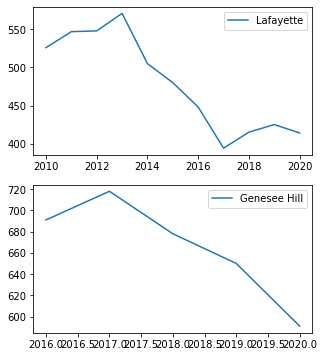

In [115]:
get_enrollment_history('Admiral','elementary')

Admiral: Madison


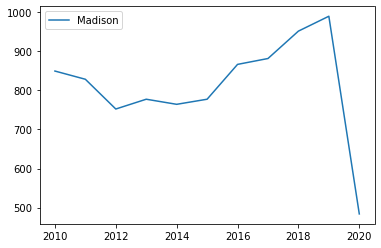

In [116]:
get_enrollment_history('Admiral','middle')

Admiral: West Seattle


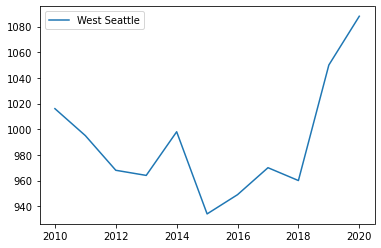

In [117]:
get_enrollment_history('Admiral','high')

Uptown: John Hay


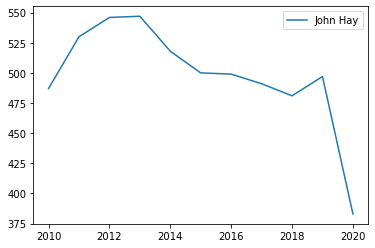

In [118]:
get_enrollment_history('Uptown','elementary')

Othello: Dearborn Park
Othello: Van Asselt
Othello: Martin Luther King Jr.
Othello: Wing Luke
Othello: Dunlap
Othello: Hawthorne


<Figure size 432x288 with 0 Axes>

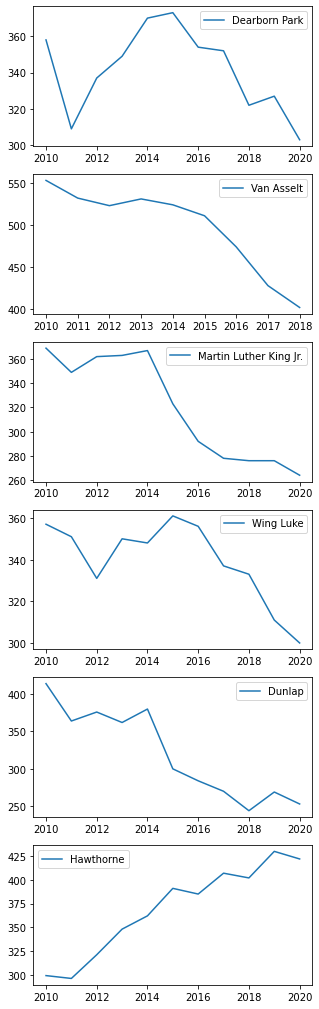

In [119]:
get_enrollment_history('Othello','elementary')

We can plot the trends in nearby schools given the name of the neighborhood and the school level we want to consider (elementary, middle, or high).  We see there are some dramatically different trends in schools near the same neighborhood.  For example, in Othello we have one school with fairly flat enrollment, four schools with dramatically declining enrollment and one with dramatically increasing (though not enough to make up for four decreasing).  This is a very interesting case and warrants further investigation.  

# Key EDA Findings

Over the last 10 years the child population growth has been more concentrated in the less dense UCV portions of the city.  In these areas the fractional growth in child population significantly outpaces the city-wide fractional growth.  UCVs will continue to play a major role in city growth and with 14% of children currently living in UCVs they will continue to play an important role in school enrollment.  

UCVs are subject to being broken up by school boundaries, particuarly UCVs on the southern end of the city.  While this can be helpful in keeping school enrollments steady by making small changes in the boundaries, it could very well break up the village feel of the neighborhood with students living nearby attending up to 6 different elementary schools, none of which lie within the boundaries of the UCV.  

Enrollment at schools near dense UCVs did not see consistent rise or fall in enrollment.  Upon examination this can be due to the splitting of the UCV across multiple schools as well as adjustments to school attendance boundaries. 



# Modeling

The goal is to use ARIMA modeling to predict enrollment based on population data.  

In order to model annual enrollment, yearly population estimates were obtained by interpolating between census years.  While this is certainly not an exact value for the true population it gives us a reasonable estimate for years in between the decennial cenus data.  Population data will be shifted to use the previous year data for the model.  

Models to compare:
- ARIMA model with no exogenous data
- ARIMA model with exogenous population data
- NULL model assuming enrollment is average of years reported (training data only)

For ARIMA, examining stationarity will help determine the appropriate differencing (d) to use.  A manual grid search for best ARIMA parameters (p,q) comparing AIC value will implemented with the best values being implemented as the final model.  




In [120]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller

#from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [121]:
# read in the data
ucvkids = pd.read_csv('./data/seattle_ucv_kids_cleaned.csv')
kids = pd.read_csv('./data/seattle_kids_cleaned.csv')
pop = pd.read_csv('./data/seattle_pop_cleaned.csv')
ucvpop = pd.read_csv('./data/seattle_ucv_pop_cleaned.csv')

In [127]:
kids.columns

Index(['Unnamed: 0', 'neighborhood', 'neighborhood_no', 'area', '1990', '2000',
       '2010', '2020'],
      dtype='object')

In [128]:
# population interpolation using difference between census data divided by 10
# starting with overall population

pop_interp = pop[['NEIGH_NAME','NEIGH_NO', 'AREA_ACRES']+[col for col in pop.columns if 'TOT_POP' in col]].copy()
pop_interp.columns = ['neighborhood','neighborhood_no','area','1990', '2000', '2010', '2020']

#ucv total population, select coumns and rename
ucv_interp = ucvpop[['NEIGH_NAME','NEIGH_NO', 'AREA_ACRES']+[col for col in pop.columns if 'TOT_POP' in col]].copy()
ucv_interp.columns = ['neighborhood','neighborhood_no','area','1990', '2000', '2010', '2020']

# kids columns already selected and renamed
kids_interp = kids.copy()
kids_interp.set_index('neighborhood')


# ucvkids need to select columns, already renamed
ucvkids_interp = ucvkids[['neighborhood','neighborhood_no','area','1990', '2000', '2010', '2020']].copy()


In [129]:
# interpolate using 1/10 the difference between 2020 and 2010 for each area
for i in range(1,10):
    year = 2010+i
    pop_interp[f'{year}'] = pop_interp['2010']+(pop_interp['2020']- pop_interp['2010'])*i/10
    ucv_interp[f'{year}'] = ucv_interp['2010']+(ucv_interp['2020']- ucv_interp['2010'])*i/10
    kids_interp[f'{year}'] = kids_interp['2010']+(kids_interp['2020']- kids_interp['2010'])*i/10
    ucvkids_interp[f'{year}'] = ucvkids_interp['2010']+(ucvkids_interp['2020']- ucvkids_interp['2010'])*i/10
    
    #same for 2000 to 2010
    year = 2000+i
    pop_interp[f'{year}'] = pop_interp['2000']+(pop_interp['2010']- pop_interp['2000'])*i/10
    ucv_interp[f'{year}'] = ucv_interp['2000']+(ucv_interp['2010']- ucv_interp['2000'])*i/10
    kids_interp[f'{year}'] = kids_interp['2000']+(kids_interp['2010']- kids_interp['2000'])*i/10
    ucvkids_interp[f'{year}'] = ucvkids_interp['2000']+(ucvkids_interp['2010']- ucvkids_interp['2000'])*i/10
    
    #same for 1990 to 2000
    year = 1990+i
    pop_interp[f'{year}'] = pop_interp['1990']+(pop_interp['2000']- pop_interp['1990'])*i/10
    ucv_interp[f'{year}'] = ucv_interp['1990']+(ucv_interp['2000']- ucv_interp['1990'])*i/10
    kids_interp[f'{year}'] = kids_interp['1990']+(kids_interp['2000']- kids_interp['1990'])*i/10
    ucvkids_interp[f'{year}'] = ucvkids_interp['1990']+(ucvkids_interp['2000']- ucvkids_interp['1990'])*i/10
    
    

In [130]:
# now get them into time order by breaking down in terms of year and getting required info
# we will separate by year, accumulated the desired values and put them in a dictionary
# then we can make the dictionary into a dataframe

basic_cols = ['neighborhood', 'neighborhood_no', 'area']
pop_info = [] #empty list for storing dictionary entries for df?

for year in range(1990, 2021):
    info = {}
    
    # population totals we want
    info['year'] = year
    info['total population'] = np.sum(pop_interp[f'{year}'])
    info['total ucv population'] = np.sum(ucv_interp[f'{year}'])
    info['total kid population'] = np.sum(kids_interp[f'{year}'])
    info['total ucv kid population'] = np.sum(ucvkids_interp[f'{year}'])
    
    if year >= 2010:
        # enrollment totals we want
        e = enrollment[enrollment['Year']==year].copy()
        info['total enrollment'] = e[e['School Name']=='TOTAL']['Enrollment'].values[0]
        info['middle enroll'] = np.sum(e[e['Service Area']=='Middle Schools']['Enrollment'])
        info['high schools'] = np.sum(e[e['Service Area']=='High Schools']['Enrollment'])
        leveldict = {'High Schools':'h', 'Middle Schools':'m', 'Service Schools':'s', 'Option Schools with Continuous Enrollment':'o', 'All':'a'}
        e['type'] = e['Service Area'].map(lambda x: leveldict.get(x,'e')) #if not one of the other levels, it is an elementary school
        info['elementary enroll'] = np.sum(e[e['type']=='e']['Enrollment'])

    pop_info.append(info)

# put it all into a dataframe
modeldf = pd.DataFrame(pop_info)

# make year into an actual datetime object and make it the index
modeldf['year'] = pd.to_datetime(modeldf['year'],format = '%Y')
modeldf.sort_values('year')
modeldf.set_index('year', inplace = True)

modeldf.tail()

,total population,total ucv population,total kid population,total ucv kid population,total enrollment,middle enroll,high schools,elementary enroll
year,,,,,,,,
2016-01-01,685673.0,273394.6,101509.8,25022.8,53102.0,9225.0,12702.0,29593.0
2017-01-01,698508.5,282122.7,102842.6,25544.1,53380.0,9433.0,13095.0,29387.0
2018-01-01,711344.0,290850.8,104175.4,26065.4,52931.0,9746.0,12942.0,28870.0
2019-01-01,724179.5,299578.9,105508.2,26586.7,53627.0,9836.0,13350.0,28957.0
2020-01-01,737015.0,308307.0,106841.0,27108.0,52381.0,9977.0,13695.0,27297.0


Examining stationarity using the ADFuller test with an alpha of 0.05.  

In [131]:
# look at stationarity with differences
modeldf['total enrollment diff1'] = modeldf['total enrollment'].diff(1)
modeldf['total enrollment diff2'] = modeldf['total enrollment'].diff(1).diff(1)
modeldf['total enrollment diff3'] = modeldf['total enrollment'].diff(1).diff(1).diff(1)

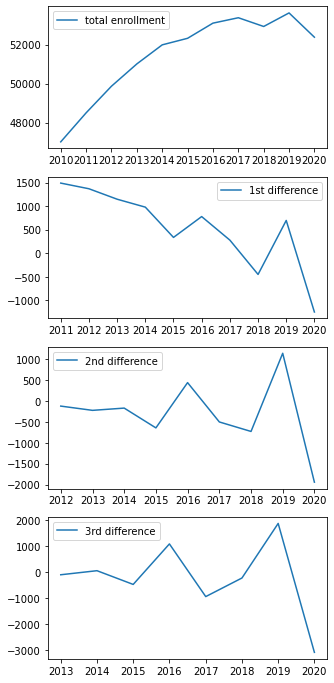

In [132]:
# quick visual look at stationarity

plt.figure(figsize=(5,12))
plt.subplot(4,1,1)
plt.plot(modeldf.index,modeldf['total enrollment'])
plt.legend(['total enrollment'])
plt.subplot(4,1,2)
plt.plot(modeldf.index,modeldf['total enrollment diff1'])
plt.legend(['1st difference'])
plt.subplot(4,1,3)
plt.plot(modeldf.index,modeldf['total enrollment diff2'])
plt.legend(['2nd difference'])
plt.subplot(4,1,4)
plt.plot(modeldf.index,modeldf['total enrollment diff3']);
plt.legend(['3rd difference']);

In [133]:
# Using the ADFuller test: setup with p cutoff of alpha = 0.05

# function copied from ARIMA modeling leeson.  Code originally written by Joseph Nelson.
# this function just pulls out the relevant information to make it easier to see
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

interpret_dftest(adfuller(modeldf['total enrollment'].dropna()))

Test Statistic   -0.180369
p-value           0.940822
dtype: float64

In [134]:
interpret_dftest(adfuller(modeldf['total enrollment diff1'].dropna()))

Test Statistic    0.018399
p-value           0.960027
dtype: float64

In [135]:
interpret_dftest(adfuller(modeldf['total enrollment diff2'].dropna()))

Test Statistic   -9.991094e+00
p-value           1.995238e-17
dtype: float64

The original enrollment is clearly not stationary from the plot as well as the ADFuller test value. A difference of 1 is still not stationary but a difference of 2 gives stationarity at the p < 0.05 level.  The ARIMA model will use twice-differenced data.  

In [136]:
# set up modeling data by splitting: REMEMBER: shuffle = False so we keep it all in order
# endogenous data
y_train, y_test = train_test_split(modeldf['total enrollment diff2'].dropna(), test_size = 0.2, shuffle = False)
#y_train, y_test = train_test_split(modeldf['total enrollment'].dropna(), test_size = 0.2, shuffle = False)

# set the frequency of the index to avoid warnings 
# following advice from: https://pretagteam.com/question/valuewarning-no-frequency-information-was-provided-so-inferred-frequency-ms-will-be-used
y_train.index = pd.DatetimeIndex(y_train.index.values, freq=y_train.index.inferred_freq)
y_test.index = pd.DatetimeIndex(y_test.index.values, freq=y_test.index.inferred_freq)

In [137]:

# using the manual grid search as we did in lesson 10.03 on ARIMA modeling
# Starting AIC, p, and q.
best_aic = 99e16
best_p = 0
best_q = 0

# Use nested for loop to iterate over values of p and q.
for p in range(5):
    for q in range(5):
        # Insert try and except statements.
        try:  
            # Fitting an ARIMA(p, 1, q) model.
            print(f'')
            # Instantiate ARIMA model.
            arima = ARIMA(endog = y_train.astype(float).dropna(),order = (p,2,q))
            # Fit ARIMA model.
            model = arima.fit(method_kwargs={"warn_convergence": False})
            # Print out AIC for ARIMA(p, 1, q) model.
            print(f'The AIC for ARIMA({p},2,{q}) is: {model.aic}')
            # Is my current model's AIC better than our best_aic?
            if model.aic < best_aic:        
                # If so, let's overwrite best_aic, best_p, and best_q.
                best_aic = model.aic
                best_p = p
                best_q = q
        except:
            pass
print()
print()
print('MODEL FINISHED!')
print(f'Our model that minimizes AIC on the training data is the ARIMA({best_p},2,{best_q}).')
print(f'This model has an AIC of {best_aic}.')


The AIC for ARIMA(0,2,0) is: 89.18866298826795





The AIC for ARIMA(1,2,0) is: 87.04863708128006





















MODEL FINISHED!
Our model that minimizes AIC on the training data is the ARIMA(1,2,0).
This model has an AIC of 87.04863708128006.


/Users/mamabear/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/mamabear/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in

In [138]:
# instantiate best model
#model = ARIMA(endog=y_train.astype(float).dropna(),order = (0,2,1))
model = ARIMA(endog=y_train.astype(float).dropna(),order = (1,2,0))

In [139]:
# fit model
arima = model.fit(method_kwargs={"warn_convergence": False})

In [140]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                 
=====================================================================================
Dep. Variable:     D2.total enrollment diff2   No. Observations:                    5
Model:                        ARIMA(1, 2, 0)   Log Likelihood                 -40.524
Method:                              css-mle   S.D. of innovations            744.778
Date:                       Wed, 22 Dec 2021   AIC                             87.049
Time:                               11:57:23   BIC                             85.877
Sample:                           01-01-2014   HQIC                            83.904
                                - 01-01-2018                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            -117.5657    213.401     -0.551      0.582    -535.824     300.693
ar.L1.D2.total enrollment diff2    -0.7192      0.240     -2.998      0.003      -1.189      -0.249
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3903           +0.0000j            1.3903            0.5000
-----------------------------------------------------------------------------
"""

In [141]:
arima.params

const                             -117.565719
ar.L1.D2.total enrollment diff2     -0.719247
dtype: float64

In [142]:
# generating predictions based on training (in sample) and test (out of sample) sets
preds_test = model.predict(params = arima.params, start=y_test.index[0], end = y_test.index[-1])
preds_train = model.predict(params = arima.params, start=y_train.index[2], end = y_train.index[-1])

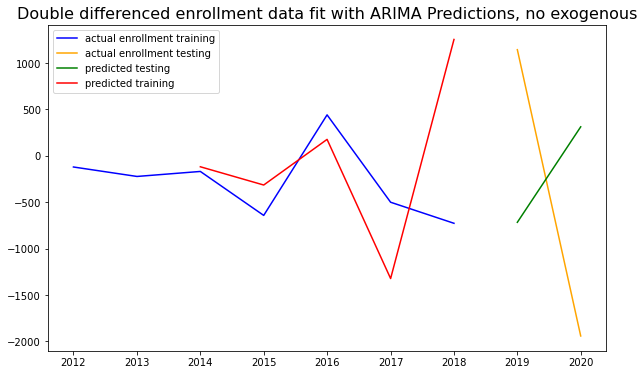

In [143]:
# Plot data.
plt.figure(figsize=(10,6))

# Plot training data.
plt.plot(y_train.index, pd.DataFrame(y_train), color = 'blue')

# Plot testing data.
plt.plot(y_test.index, pd.DataFrame(y_test), color = 'orange')

# Plot predicted test values.
plt.plot(y_test.index, preds_test, color = 'green')
plt.plot(y_train.index[2:], preds_train, color = 'red')

plt.legend(['actual enrollment training', 'actual enrollment testing', 'predicted testing', 'predicted training'])
plt.title(label = f'Double differenced enrollment data fit with ARIMA Predictions, no exogenous', fontsize=16)
plt.show();

Now to get back to the actual enrollment, sum up the changes?  I am really not sure how to undo the double difference to get back to the original prediction?  


In [144]:
# find RMSE
mean_squared_error(y_train[2:], preds_train, squared = False),mean_squared_error(y_test, preds_test, squared = False) 

(978.289701750095, 2067.654016356238)

In [145]:
# now figure out the exogenous data
#exog = modeldf['total kid population'] # this one works

modeldf['kid population lag 1 year'] = modeldf['total kid population'].shift(1)
exog = modeldf['kid population lag 1 year']
exog_train = exog[(exog.index>=y_train.index[0]) & (exog.index<=y_train.index[-1])]

exog_test = exog[(exog.index>=y_test.index[0]) & (exog.index<=y_test.index[-1])]

# inferring the frequency
exog_train.index = pd.DatetimeIndex(exog_train.index.values,
                               freq=exog_train.index.inferred_freq)
exog_test.index = pd.DatetimeIndex(exog_test.index.values,
                               freq=exog_test.index.inferred_freq)

In [146]:
exog_train

2012-01-01     94845.8
2013-01-01     96178.6
2014-01-01     97511.4
2015-01-01     98844.2
2016-01-01    100177.0
2017-01-01    101509.8
2018-01-01    102842.6
Freq: AS-JAN, Name: kid population lag 1 year, dtype: float64

In [147]:

# using the manual grid search as we did in lesson 10.03 on ARIMA modeling
# Starting AIC, p, and q.
best_aic = 99e16
best_p = 0
best_q = 0

# Use nested for loop to iterate over values of p and q.
for p in range(5):
    for q in range(5):
        # Insert try and except statements.
        try:  
            # Fitting an ARIMA(p, 1, q) model.
            print(f'')
            # Instantiate ARIMA model.
            arima = ARIMA(endog = y_train.astype(float).dropna(),exog = exog_train,order = (p,2,q))
            # Fit ARIMA model.
            model = arima.fit(method_kwargs={"warn_convergence": False})
            # Print out AIC for ARIMA(p, 1, q) model.
            print(f'The AIC for ARIMA({p},2,{q}) is: {model.aic}')
            # Is my current model's AIC better than our best_aic?
            if model.aic < best_aic:        
                # If so, let's overwrite best_aic, best_p, and best_q.
                best_aic = model.aic
                best_p = p
                best_q = q
        except:
            pass
print()
print()
print('MODEL FINISHED!')
print(f'Our model that minimizes AIC on the training data is the ARIMA({best_p},2,{best_q}).')
print(f'This model has an AIC of {best_aic}.')


The AIC for ARIMA(0,2,0) is: 91.17882116307189





The AIC for ARIMA(1,2,0) is: 88.65823238278647





















MODEL FINISHED!
Our model that minimizes AIC on the training data is the ARIMA(1,2,0).
This model has an AIC of 88.65823238278647.


/Users/mamabear/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/mamabear/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:728: RuntimeWarning: divide by zero encountered in true_divid

In [148]:
model2 = ARIMA(endog = y_train.astype(float).dropna(),exog = exog_train,order = (1,2,0))

In [149]:
arima2 = model2.fit()

In [150]:
# generating predictions based on training (in sample) and test (out of sample) sets
preds_test2 = model2.predict(params = arima2.params, exog = exog_test, start=y_test.index[0], end = y_test.index[-1])
preds_train2 = model2.predict(params = arima2.params, exog= exog_train, start=y_train.index[2], end = y_train.index[-1])

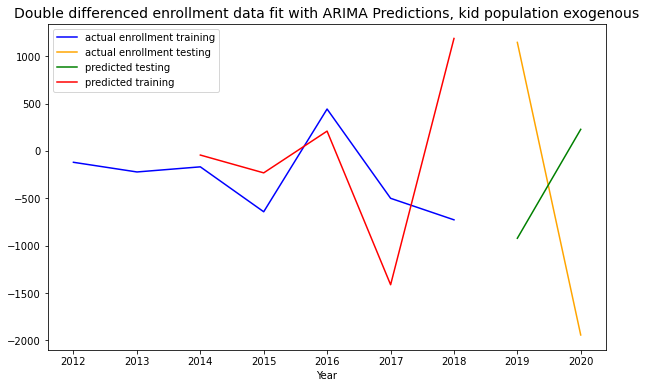

In [151]:
# Plot data.
plt.figure(figsize=(10,6))

# Plot training data.
plt.plot(y_train.index, pd.DataFrame(y_train), color = 'blue')

# Plot testing data.
plt.plot(y_test.index, pd.DataFrame(y_test), color = 'orange')

# Plot predicted test values.
plt.plot(y_test.index, preds_test2, color = 'green')
plt.plot(y_train.index[2:], preds_train2, color = 'red')

plt.legend(['actual enrollment training', 'actual enrollment testing', 'predicted testing', 'predicted training'])
plt.title(label = f'Double differenced enrollment data fit with ARIMA Predictions, kid population exogenous', fontsize=14)
plt.xlabel('Year')
plt.show();

# Model evaluation
Root mean square error is used to compare the models.  This allows comparison of performance for the various models.

In [152]:
# compute RMSE for each model
# ARIMA no exog
print('ARIMA: no exogenous data')
print(mean_squared_error(y_train[2:],preds_train, squared=False),mean_squared_error(y_test,preds_test))
print()
# ARIMA population exog
print('ARIMA: exogenous population data ')
print(mean_squared_error(y_train[2:],preds_train2, squared=False),mean_squared_error(y_test,preds_test2))
print()
# Null mode
# using the average enrollment as the value input to the model
# this would result in a twice differenced value of 0.  
average_enrollment = np.average(modeldf[(modeldf.index>=y_train.index[0])& (modeldf.index<=y_train.index[-1])]['total enrollment'].dropna()) # drop nans first
nulltrain = y_train*0 
nulltest = y_test*0 
print('Null model')
print(mean_squared_error(y_train,nulltrain, squared=False), mean_squared_error(y_test,nulltest,squared=False))



ARIMA: no exogenous data
978.289701750095 4275193.131354083

ARIMA: exogenous population data 
972.7625496973519 4489167.062451268

Null model
459.4973962307699 1594.1124489821914


The null model has small and is relatively consist between training and testing data.   

The no-exogenous data ARIMA model shows significantly worse performance by a factor of 2 for training data.

The ARIMA model using exogenous population data shows almost no improvement over the base ARIMA model.   

Both ARIMA models show large errors for the most recent (test) data.  This is most likely coming from the large decline in enrollment experience in 2020 due to the global pandemic and not an issue with the model itself.  

Overall the ARIMA model does not show improvement over a simple null model predicting the average enrollment.  

Given the complexity of the ARIMA model, the null model is strongly preferred.  It provides better performance for a much lower complexity.  

# Modeling Results

The baseline model assigning the average enrollment for the previous few years shows strong performance.  The ARIMA models show worse performance than a simple averaging model.  

There is a general trend up in the enrollment data 





In [154]:
# MLR model
from sklearn.linear_model import LinearRegression